In [134]:
import pandas as pd
import numpy as np

In [135]:
raw_Housing_Data=pd.read_csv(r'C:\Users\nero\Desktop\1. Regression - Module - (Housing Prices).csv')

In [136]:
raw_Housing_Data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [137]:
import matplotlib.pyplot as plt

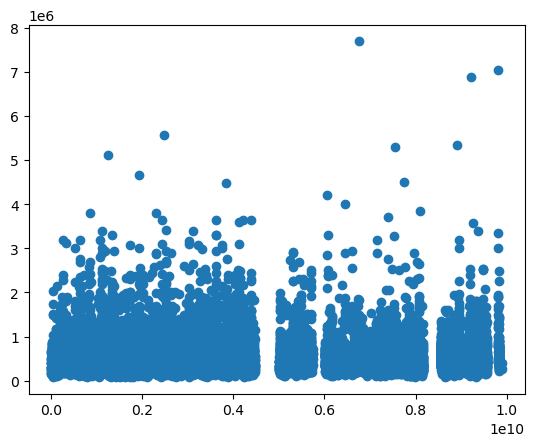

In [138]:
plt.scatter(x=raw_Housing_Data['ID'],y=raw_Housing_Data['Sale Price'])

In [139]:
raw_Housing_Data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

In [140]:
import seaborn as sn

<Axes: xlabel='Sale Price'>

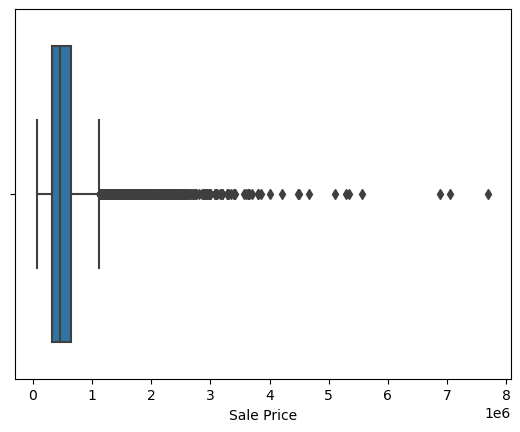

In [141]:
sn.boxplot(x=raw_Housing_Data['Sale Price'])

In [142]:
q1=raw_Housing_Data['Sale Price'].quantile(0.25)
q3=raw_Housing_Data['Sale Price'].quantile(0.75)

In [143]:
iqr=q3-q1

In [144]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
upper_limit ,lower_limit

(1129575.0, -162625.0)

In [145]:
def set_Limiter(value):
    if value<lower_limit:
        return lower_limit
    if value>upper_limit:
        return upper_limit
    else:
        return value

In [146]:
raw_Housing_Data['Sale Price']=raw_Housing_Data['Sale Price'].apply(set_Limiter)

In [147]:
raw_Housing_Data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

The missing values in the target value can be treated by deleting the entire row or by imputting value or replacing values with the mean,mode,median as required . Imputting values can effect the performance of the model as we are not applying original target value .

# deleting the missing values

to delete value we will be using the dropna function .here we are deleting the dependent variables values so if we  impute value of the dependent variable with mean median mode it will directly effects the model.

In [148]:
raw_Housing_Data.dropna(inplace=True,axis=0,subset=['Sale Price'])

inplace=True--> it will drop the values in the same dataset
axis=0 --> it will specify that row will be deleted
subset ==> it will specify the column to be deleted

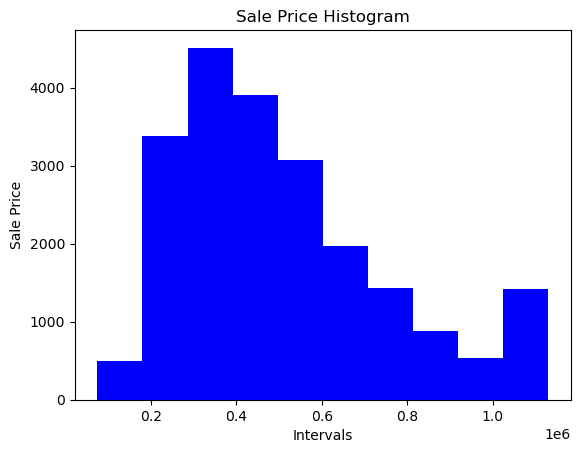

In [149]:
plt.hist(raw_Housing_Data['Sale Price'],bins=10,color='blue')
plt.xlabel("Intervals")
plt.ylabel("Sale Price")
plt.title("Sale Price Histogram")
plt.show()

The data is more Skewed towards the lower values as histogram makes a bell shape or also known as positively skewed distribution .The mean will always be greater than the median

In [150]:
raw_Housing_Data.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

Now to handle the missing values in the independent variables we use imuputing method to do that lets create array variable Numerical_columns of all the independent variables with missing values

In [151]:
Numerical_Columns=['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)'
                  ,'Latitude','Longitude','Living Area after Renovation (in Sqft)']

In [152]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(missing_values=np.nan,strategy='median')

raw_Housing_Data[Numerical_Columns]=imputer.fit_transform(raw_Housing_Data[Numerical_Columns])

In [153]:
raw_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

Treating missing values in Zipcode

In [154]:
column=raw_Housing_Data['Zipcode'].values.reshape(-1,1)

imputer=SimpleImputer(missing_values=np.nan,strategy="most_frequent")

raw_Housing_Data['Zipcode']=imputer.fit_transform(column)

In [155]:
raw_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

# Categorical values


In [156]:
raw_Housing_Data['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [157]:
mapp={
    'None':'0',
    'Once':'1',
    'Twice':'2',
    'Thrice':'3',
    'Four':'4'
}

In [158]:
raw_Housing_Data['No of Times Visited']=raw_Housing_Data['No of Times Visited'].map(mapp)

In [159]:
raw_Housing_Data['Ever Renovated']=np.where(raw_Housing_Data['Renovated Year']==0,'no','yes')

In [160]:
raw_Housing_Data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,no
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,yes
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,no
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,no
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,no


In [161]:
raw_Housing_Data['Purchase Year']=pd.DatetimeIndex(raw_Housing_Data['Date House was Sold']).year

In [162]:
raw_Housing_Data['Year Since Renovated']=np.where(raw_Housing_Data['Ever Renovated']=='no',0,
                                                  raw_Housing_Data['Purchase Year']-raw_Housing_Data['Renovated Year']);

In [163]:
raw_Housing_Data.drop(columns=['Purchase Year','Date House was Sold','Renovated Year'],inplace=True)

In [164]:
raw_Housing_Data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Year Since Renovated
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,no,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,no,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,no,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,no,0


In [165]:
raw_Housing_Data.to_csv('transformed Housing Data',index=False)

# Corelation

correaltion is a measure of dependence or association between two variables i.e=have does one variable change with change in other

In [166]:
raw_Housing_Data['Sale Price'].corr(raw_Housing_Data['Flat Area (in Sqft)'])

0.6951704258420669

this is the one of the way to find correaltion between the two variables 

In [167]:
np.corrcoef(raw_Housing_Data['Sale Price'],raw_Housing_Data['Flat Area (in Sqft)'])

array([[1.        , 0.69517043],
       [0.69517043, 1.        ]])

In [168]:
raw_Housing_Data.drop(columns=['ID']).corr()

C:\Users\nero\AppData\Local\Temp\ipykernel_11956\2463628699.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  raw_Housing_Data.drop(columns=['ID']).corr()


,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Since Renovated
Sale Price,1.000000,0.339407,0.535124,0.695170,0.101319,0.298913,0.680914,0.606527,0.307513,-0.064306,-0.043047,0.402430,0.045401,0.629944,0.092325,0.065907
No of Bedrooms,0.339407,1.000000,0.515813,0.576628,0.031692,0.175536,0.349223,0.477549,0.303294,-0.154113,-0.152760,-0.008708,0.129569,0.391771,0.029264,-0.007198
No of Bathrooms,0.535124,0.515813,1.000000,0.754568,0.087732,0.500776,0.635638,0.685088,0.283798,-0.505954,-0.203951,0.024570,0.223171,0.568568,0.087226,0.003551
Flat Area (in Sqft),0.695170,0.576628,0.754568,1.000000,0.172721,0.354142,0.705725,0.876226,0.435142,-0.318146,-0.199380,0.052538,0.240091,0.756185,0.183223,0.023503
Lot Area (in Sqft),0.101319,0.031692,0.087732,0.172721,1.000000,-0.005162,0.102314,0.183492,0.015252,-0.053119,-0.129551,-0.085719,0.229449,0.144507,0.718527,0.013835
No of Floors,0.298913,0.175536,0.500776,0.354142,-0.005162,1.000000,0.461368,0.524031,-0.245572,-0.489244,-0.059222,0.049692,0.125620,0.280106,-0.011204,-0.000901
Overall Grade,0.680914,0.349223,0.635638,0.705725,0.102314,0.461368,1.000000,0.705153,0.145232,-0.456711,-0.185844,0.111226,0.201736,0.681362,0.107581,-0.024388
Area of the House from Basement (in Sqft),0.606527,0.477549,0.685088,0.876226,0.183492,0.524031,0.705153,1.000000,-0.051825,-0.423848,-0.261124,-0.000819,0.343793,0.731996,0.194106,0.010491
Basement Area (in Sqft),0.307513,0.303294,0.283798,0.435142,0.015252,-0.245572,0.145232,-0.051825,1.000000,0.133072,0.074933,0.110451,-0.144822,0.200302,0.017263,0.029158
Age of House (in Years),-0.064306,-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,-0.456711,-0.423848,0.133072,1.000000,0.346928,0.148083,-0.409515,-0.326307,-0.071016,0.203375


In [169]:
raw_Housing_Data

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Year Since Renovated
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,no,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,no,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,no,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,No,0,Fair,...,1530.0,0,9,98103.0,47.6993,-122.346,1530.0,1509,no,0
21609,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,No,0,Fair,...,2310.0,0,4,98146.0,47.5107,-122.362,1830.0,7200,no,0
21610,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,No,0,Fair,...,1020.0,0,9,98144.0,47.5944,-122.299,1020.0,2007,no,0
21611,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,No,0,Fair,...,1600.0,0,14,98027.0,47.5345,-122.069,1410.0,1287,no,0


In [170]:
raw_Housing_Data['Condition of the House'].value_counts

<bound method IndexOpsMixin.value_counts of 0             Fair
1             Fair
2             Fair
3        Excellent
4             Fair
           ...    
21608         Fair
21609         Fair
21610         Fair
21611         Fair
21612         Fair
Name: Condition of the House, Length: 21609, dtype: object>

Text(0.5, 1.0, 'condition of the house')

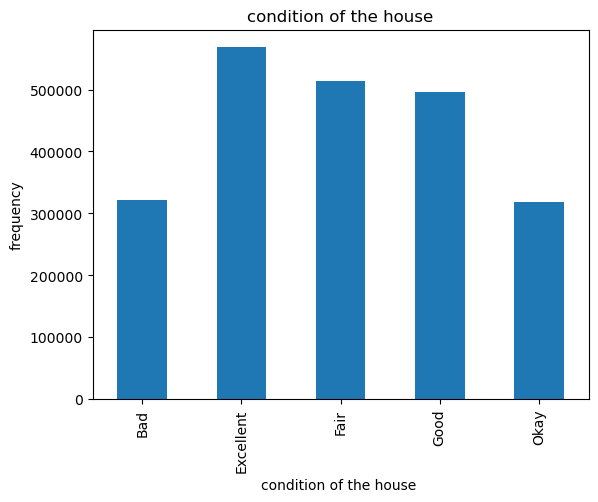

In [171]:
raw_Housing_Data.groupby('Condition of the House',)['Sale Price'].mean().plot(kind='bar')
plt.ylabel('frequency')
plt.xlabel('condition of the house ')
plt.title('condition of the house')


# ANOVA


In [172]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [173]:
raw_Housing_Data=raw_Housing_Data.rename(columns={'Sale Price':'Sale_Price'})

In [174]:
raw_Housing_Data=raw_Housing_Data.rename(columns={'Waterfront View':'Waterfront_View'})

In [175]:
raw_Housing_Data=raw_Housing_Data.rename(columns={'Ever Renovated':'Ever_Renovated'})

In [176]:
raw_Housing_Data=raw_Housing_Data.rename(columns={'Condition of the House':'Condition_of_the_House'})

now we are going to check for anova for sales_price and different categorical variables

In [177]:
mod=ols('Sale_Price ~ Condition_of_the_House', data=raw_Housing_Data).fit()

In [178]:
Annova_Table=sm.stats.anova_lm(mod,typ=2)

In [179]:
print(Annova_Table)

                              sum_sq       df         F        PR(>F)
Condition_of_the_House  1.441831e+13      4.0  58.25563  5.447605e-49
Residual                1.336752e+15  21604.0       NaN           NaN


also create other anova

# dUMMY VARIABLES

DUMMY VARIABLE tends to convert the categorical variabel to numerical varible as regression model only\
accepts the numerical variables

In [180]:
raw_Housing_Data=pd.get_dummies(raw_Housing_Data,columns=['Condition_of_the_House'],drop_first=True)

In [181]:
raw_Housing_Data.columns

Index(['ID', 'Sale_Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'Waterfront_View', 'No of Times Visited', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Zipcode', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'Ever_Renovated',
       'Year Since Renovated', 'Condition_of_the_House_Excellent',
       'Condition_of_the_House_Fair', 'Condition_of_the_House_Good',
       'Condition_of_the_House_Okay'],
      dtype='object')

In [182]:
raw_Housing_Data=pd.get_dummies(raw_Housing_Data,columns=['Waterfront_View','Ever_Renovated'])

In [183]:
raw_Housing_Data.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Lot Area after Renovation (in Sqft),Year Since Renovated,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_No,Waterfront_View_Yes,Ever_Renovated_no,Ever_Renovated_yes
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,5650,0,0,1,0,0,1,0,1,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,7639,26,0,1,0,0,1,0,0,1
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,8062,0,0,1,0,0,1,0,1,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,5000,0,1,0,0,0,1,0,1,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,7503,0,0,1,0,0,1,0,1,0


# Binning

In [184]:

Zip_Table=raw_Housing_Data.groupby('Zipcode',).agg({'Sale_Price':'mean'}).sort_values('Sale_Price',ascending=True)

In [185]:
Zip_Table

,Sale_Price
Zipcode,
98002.0,2.342840e+05
98168.0,2.403284e+05
98032.0,2.512962e+05
98001.0,2.808047e+05
98148.0,2.849086e+05
...,...
98109.0,7.876028e+05
98112.0,8.807990e+05
98040.0,9.621087e+05


pd.cut is used for segemnt values and sort them into bins

In [186]:
Zip_Table['ZipCode_Group']=pd.cut(Zip_Table['Sale_Price'],bins=10,
                               labels=[
                                   'ZipCode_Group_0',
                                   'ZipCode_Group_1',
                                   'ZipCode_Group_2',
                                   'ZipCode_Group_3',
                                   'ZipCode_Group_4',
                                   'ZipCode_Group_5',
                                   'ZipCode_Group_6',
                                   'ZipCode_Group_7',
                                   'ZipCode_Group_8',
                                   'ZipCode_Group_9'
                               ],include_lowest=True)

In [187]:
Zip_Table=Zip_Table.drop(columns="Sale_Price")

In [188]:
raw_Housing_Data=pd.merge(raw_Housing_Data,
                         Zip_Table,
                         left_on='Zipcode',
                         how='left',
                          right_index=True
                         )

In [189]:
raw_Housing_Data=raw_Housing_Data.drop(columns=['Zipcode'])

In [190]:
raw_Housing_Data

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Year Since Renovated,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_No,Waterfront_View_Yes,Ever_Renovated_no,Ever_Renovated_yes,ZipCode_Group
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,0,0,1,0,0,1,0,1,0,ZipCode_Group_0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,26,0,1,0,0,1,0,0,1,ZipCode_Group_2
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,0,0,1,0,0,1,0,1,0,ZipCode_Group_2
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,0,1,0,0,0,1,0,1,0,ZipCode_Group_3
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,0,0,1,0,0,1,0,1,0,ZipCode_Group_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,...,0,0,1,0,0,1,0,1,0,ZipCode_Group_3
21609,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,...,0,0,1,0,0,1,0,1,0,ZipCode_Group_1
21610,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,...,0,0,1,0,0,1,0,1,0,ZipCode_Group_3
21611,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,...,0,0,1,0,0,1,0,1,0,ZipCode_Group_4


In [191]:
raw_Housing_Data=pd.get_dummies(raw_Housing_Data,columns=['ZipCode_Group'],drop_first=True)

In [192]:
raw_Housing_Data

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Ever_Renovated_yes,ZipCode_Group_ZipCode_Group_1,ZipCode_Group_ZipCode_Group_2,ZipCode_Group_ZipCode_Group_3,ZipCode_Group_ZipCode_Group_4,ZipCode_Group_ZipCode_Group_5,ZipCode_Group_ZipCode_Group_6,ZipCode_Group_ZipCode_Group_7,ZipCode_Group_ZipCode_Group_8,ZipCode_Group_ZipCode_Group_9
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,1,0,1,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,...,0,0,0,1,0,0,0,0,0,0
21609,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,...,0,1,0,0,0,0,0,0,0,0
21610,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,...,0,0,0,1,0,0,0,0,0,0
21611,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,...,0,0,0,0,1,0,0,0,0,0


In [193]:
raw_Housing_Data.to_csv('transformed_data2.csv',index=False)

#  Splitting The Data

data will be spiltted into test and train data 

Where train data will be 70% of the original data and will be used to train the model and test data will br of 30% of original data and will  be used to test the outcoming result from the model

before this we must create X variable for dependent data and  Y variable for indenpendent data

In [194]:
X=raw_Housing_Data.iloc[:,0]

In [195]:
Y=raw_Housing_Data.iloc[:,1:31]

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
X_train,X_test,Y_test,Y_train=train_test_split(X,Y,test_size=0.3)

In [198]:
X_train.shape

(15126,)

In [199]:
Y_train.shape

(6483, 30)

In [200]:
X_test.shape

(6483,)

In [201]:
Y_test.shape

(15126, 30)

# Feature Scaling

feature scaling is all about the scaling the feature variables into the same range

different Techniques of feature Scaling

Standardisation , min max Scaling , Normalisation

standardistion method should be used for scaling the feature variables when linear regeression model is build

In [202]:
from sklearn import preprocessing

In [203]:
scale=preprocessing.StandardScaler()

In [204]:
Y_train=scale.fit_transform(Y_train)

In [205]:
Y_train

array([[ 2.48403466,  0.64804941,  0.19717692, ..., -0.46804628,
        -0.21126814, -0.27668148],
       [-1.1250958 , -0.37069558, -1.41805935, ..., -0.46804628,
        -0.21126814, -0.27668148],
       [-0.38717061,  1.6667944 ,  0.19717692, ..., -0.46804628,
        -0.21126814, -0.27668148],
       ...,
       [ 0.15166041, -0.37069558,  0.52022418, ..., -0.46804628,
        -0.21126814, -0.27668148],
       [-0.32712317,  0.64804941,  0.52022418, ..., -0.46804628,
        -0.21126814, -0.27668148],
       [ 0.47523831,  0.64804941,  0.52022418, ...,  2.13654086,
        -0.21126814, -0.27668148]])

In [206]:
Y_test=scale.fit_transform(Y_test)

In [207]:
Y_test[0]

array([-0.99548228,  0.69062873,  0.49181803, -0.10488516, -0.13156147,
        0.92832098, -0.3037074 , -0.56845815,  0.24107728, -0.66256561,
       -0.78144509, -1.79027998,  1.53550116, -0.71752506, -0.11060614,
       -0.16589059, -0.29381247,  0.73688333, -0.59756069, -0.08979966,
        0.08675719, -0.08675719,  0.20743324, -0.20743324, -0.35264554,
        2.0921705 , -0.41933227, -0.48380815, -0.21528478, -0.29234953])